# This script analyses frequency and expenditure trends based on regional and demographic information and produces visualisations for some of these elements

## The script contains the following sections
### 1. Importing libraries
### 2. Importing Data
### 3. Reducing Variables for Analysis
### 4. Basic Regional Analysis of Spending Trends
### 5. Applying Exclusion Flag
### 6. Developing Customer Profiles by Demographic Information (Bar Chart)
#### 6.1 Investigating top product departments by demographic
#### 6.2 Investigating and visualising order Frequency and Expenditure by Demographic (Dual bar)
#### 6.3 Investigating order Frequency and Expenditure by Region (Table)
#### 6.4 Investigating and visualising top departments by Demographic and Regions (Heatmap)



# 1. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Data

In [2]:
# Folder Shortcut
path = r'C:\Users\seank\OneDrive\Dokumente\Career Foundry Data Analytics Course\Data Immersion\4 Python\03-2020_Instacart_Basket _Analysis'

In [3]:
# Importing Merged Orders Products Customers Data
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'ords_prods_cust.pkl'))

In [4]:
# Importing department id dictionary (saved as pickle) to check department IDs
dep_dict = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'dep_data_dict.pkl'))

# 3. Reducing Variables for analysis

In [5]:
ords_prods_cust.columns

Index(['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_days', 'Busiest_hours',
       'max_order', 'loyalty_flag', 'avg_price', 'spending_flag',
       'frequency_flag', '_merge'],
      dtype='object')

In [6]:
# Creating a df with limited variables needed for analyses
       # Dropping product_id, add_to_cart_order, reordered,  busiest_hours, _merge
df_keepvars = ords_prods_cust[['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'price_range_loc',
       'days_since_prior_order', 'product_name', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'frequency_flag']]

# 4. Regional Analysis of Spending

In [7]:
# Define state-to-region mapping
state_to_region = {
    # Region 1 (Northeast)
    "Maine": "Northeast", "New Hampshire": "Northeast", "Vermont": "Northeast", 
    "Massachusetts": "Northeast", "Rhode Island": "Northeast", "Connecticut": "Northeast",
    "New York": "Northeast", "Pennsylvania": "Northeast", "New Jersey": "Northeast",
    # Region 2 (Midwest)
    "Wisconsin": "Midwest", "Michigan": "Midwest", "Illinois": "Midwest", 
    "Indiana": "Midwest", "Ohio": "Midwest", "North Dakota": "Midwest", 
    "South Dakota": "Midwest", "Nebraska": "Midwest", "Kansas": "Midwest", 
    "Minnesota": "Midwest", "Iowa": "Midwest", "Missouri": "Midwest",
    # Region 3 (South)
    "Delaware": "South", "Maryland": "South", "District of Columbia": "South", 
    "Virginia": "South", "West Virginia": "South", "North Carolina": "South", 
    "South Carolina": "South", "Georgia": "South", "Florida": "South", 
    "Kentucky": "South", "Tennessee": "South", "Mississippi": "South", "Alabama": "South", 
    "Oklahoma": "South", "Texas": "South", "Arkansas": "South", "Louisiana": "South",
    # Region 4 (West)
    "Idaho": "West", "Montana": "West", "Wyoming": "West", "Nevada": "West", 
    "Utah": "West", "Colorado": "West", "Arizona": "West", "New Mexico": "West", 
    "Alaska": "West", "Washington": "West", "Oregon": "West", "California": "West", "Hawaii": "West"
}

In [8]:
# Add region column
df_keepvars['region'] = df_keepvars['state'].map(state_to_region)

C:\Users\seank\AppData\Local\Temp\ipykernel_2556\3826933886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keepvars['region'] = df_keepvars['state'].map(state_to_region)


In [9]:
# Checking if everywhere assigned properly
df_unassigned_check = df_keepvars[df_keepvars['region'].isna()]
print(df_unassigned_check)

Empty DataFrame
Columns: [user_id, gender, state, age, n_dependants, fam_status, income, order_id, order_number, orders_day_of_week, order_hour_of_day, price_range_loc, days_since_prior_order, product_name, department_id, prices, max_order, loyalty_flag, avg_price, spending_flag, frequency_flag, region]
Index: []

[0 rows x 22 columns]


In [10]:
# Checking values
df_keepvars['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# DF that only contains one row per user so counts are based on users
df_unique_users = df_keepvars.drop_duplicates(subset='user_id')

In [12]:
# Creating crosstab of region with spending showing counts
cross_reg_spend = pd.crosstab(df_unique_users['region'], df_unique_users['spending_flag'],
                              dropna=False)
print(cross_reg_spend)

spending_flag  High spender  Low spender
region                                  
Midwest                 801        47718
Northeast               545        35843
South                  1141        67596
West                    901        51664


In [13]:
# Creating crosstab of region with spending showing percentages
cross_reg_spend_per = pd.crosstab(df_unique_users['region'], df_unique_users['spending_flag'],
                              dropna=False,
                              normalize='index')
print(cross_reg_spend_per)

spending_flag  High spender  Low spender
region                                  
Midwest            0.016509     0.983491
Northeast          0.014977     0.985023
South              0.016600     0.983400
West               0.017141     0.982859


In all regions the percentage of low:high spenders is basically the same at roughly 98.5 to 1.5. The overall highest amount of high spenders are in the South, lowest in the Northeast

# 5 Excluding customers with less than 5 orders

In [14]:
# First checking how many will be excluded
    # Counting rows where max_order < 5
excluded_rows_count = len(df_keepvars[df_keepvars['max_order'] < 5])
print(excluded_rows_count)

1440295


In [15]:
# Dropping customers with less than 5 orders 
df_min5 = df_keepvars.loc[df_keepvars['max_order'] >= 5]

This df is exported after the next step of merging department names

In [16]:
df_min5.shape

(30964564, 22)

In [18]:
# Merging main dataset with the dep_dict df based on department_id
df_min5 = df_min5.merge(dep_dict[['department']], 
                        left_on='department_id', 
                        right_index=True, 
                        how='left')

# Check the result
df_min5[['department_id', 'department']].head()

,department_id,department
0,4,produce
1,16,dairy eggs
2,16,dairy eggs
3,4,produce
4,4,produce


In [19]:
df_min5.columns

Index(['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'price_range_loc', 'days_since_prior_order',
       'product_name', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'frequency_flag', 'region', 'department'],
      dtype='object')

In [20]:
# Drop old var to save space 
df_min5.drop(columns=['department_id'],
             inplace = True)

In [21]:
# Exporting
df_min5.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'keepvars_min5.pkl'))

# 6. Creating Demographic Profile Variable based on age, income, family status and # dependents

In [22]:
# function creating demographic profiles to assign
def classify_demographics(row):
    # Age Profile
    if row['age'] < 30:
        age_profile = 'Under 30'
    elif 30 <= row['age'] <= 50:
        age_profile = '31-50'
    else:
        age_profile = '51+'

    # Income Profile
    if row['income'] < 100000:
        income_profile = 'Income < 100K'
    else:
        income_profile = 'Income 100K+'

    # Family Status Profile
    if row['fam_status'] == 'married':
        family_status_profile = 'Married'
    elif row['fam_status'] == 'single':
        family_status_profile = 'Single'
    elif row['fam_status'] == 'divorced/widowed':
        family_status_profile = 'Divorced/Widowed'
    elif row['fam_status'] == 'living with parents and siblings':
        family_status_profile = 'Living with family'

    # Dependants Profile
    if row['n_dependants'] == 0:
        dependants_profile = 'No Dependants'
    else:
        dependants_profile = 'With Dependants'

    # Combine all demographics into a profile
    demographic_profile = f"{age_profile}, {income_profile}, {family_status_profile}, {dependants_profile}"
    
    return demographic_profile

In [23]:
# Apply demographic classification to each row in df
df_min5['demographic_profile'] = df_min5.apply(classify_demographics, axis=1)

# Check the result
df_min5[['user_id', 'demographic_profile']].head()

,user_id,demographic_profile
0,26711,"31-50, Income 100K+, Married, With Dependants"
1,26711,"31-50, Income 100K+, Married, With Dependants"
2,26711,"31-50, Income 100K+, Married, With Dependants"
3,26711,"31-50, Income 100K+, Married, With Dependants"
4,26711,"31-50, Income 100K+, Married, With Dependants"


In [24]:
# Exporting this df
df_min5.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'ords_prods_cust_min5_demog.pkl'))

In [25]:
df_min5['demographic_profile'].value_counts()

demographic_profile
51+, Income 100K+, Married, With Dependants                     7796120
31-50, Income < 100K, Married, With Dependants                  4961440
51+, Income < 100K, Married, With Dependants                    3391342
Under 30, Income < 100K, Married, With Dependants               2800031
31-50, Income 100K+, Married, With Dependants                   2705996
51+, Income 100K+, Divorced/Widowed, No Dependants              1846202
31-50, Income < 100K, Single, No Dependants                     1647840
Under 30, Income < 100K, Living with family, With Dependants    1433624
Under 30, Income < 100K, Single, No Dependants                  1398728
31-50, Income 100K+, Single, No Dependants                       884186
51+, Income < 100K, Divorced/Widowed, No Dependants              799069
51+, Income 100K+, Single, No Dependants                         789678
51+, Income < 100K, Single, No Dependants                        325088
Under 30, Income 100K+, Married, With Depend

We already see that the top 5 demographics in terms of items ordered are all married with dependants

In [26]:
# Counting unique users of each demographics 
    # first df that only contains unique users 
df_unique_min5 = df_min5.drop_duplicates(subset='user_id')

Plotting the counts of users in each demographic, colour-coding users with dependants for emphasis

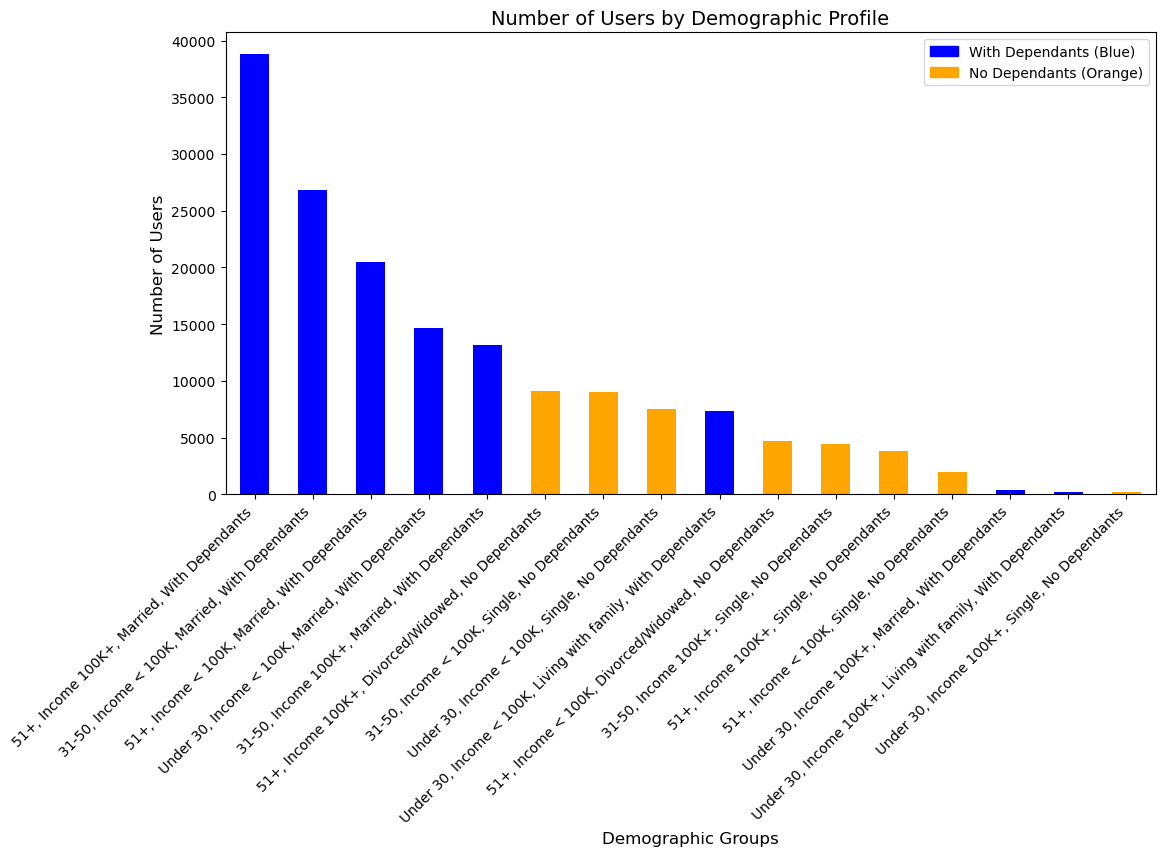

In [28]:
import matplotlib.patches as mpatches

# Compute number of unique users per demographic group and sort them in descending order
profile_counts = ( df_unique_min5.groupby('demographic_profile')['user_id']
                  .nunique()
                  .sort_values(ascending=False) )

# Define colors: Blue for "With Dependants", Orange for "No Dependants"
colors = ['blue' if 'With Dependants' in profile else 'orange' for profile in profile_counts.index]

# Create figure and bar chart
plt.figure(figsize=(12, 6))
bar_demo = profile_counts.plot(kind='bar', 
                               color=colors)

# Set title and labels
bar_demo.set_title('Number of Users by Demographic Profile', fontsize=14)
bar_demo.set_xlabel("Demographic Groups", fontsize=12)
bar_demo.set_ylabel("Number of Users", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add legend
blue_patch = mpatches.Patch(color='blue', label='With Dependants (Blue)')
orange_patch = mpatches.Patch(color='orange', label='No Dependants (Orange)')
plt.legend(handles=[blue_patch, orange_patch], loc='upper right')

# Show the plot

bar_demo.tick_params(axis='x', labelsize=10)  # Adjust font size of x-axis ticks
plt.show()

The graph shows clearly that our largest demographic profiles are people with dependants

In [29]:
# Saving
bar_demo.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_demographics.png'))

# 6.1 Finding each demographic's top departments they order from

In [30]:
df_min5.columns

Index(['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'price_range_loc', 'days_since_prior_order',
       'product_name', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'frequency_flag', 'region', 'department',
       'demographic_profile'],
      dtype='object')

In [31]:
# Step 1: Grouping by 'demographic_profile' and 'department' to count number of orders per department
department_counts = ( df_min5.groupby(['demographic_profile', 'department'])['department']
                     .count()
                     .reset_index(name='order_count') )

# Step 2: For each demographic group, get top 3 and 10 departments by order count
top10_departments_by_demographic = ( department_counts
                                  .sort_values(by=['demographic_profile', 'order_count'], 
                                               ascending=[True, False])
                                                 .groupby('demographic_profile')
                                                 .head(10) )

top3_departments_by_demographic = ( department_counts
                                  .sort_values(by=['demographic_profile', 'order_count'], 
                                               ascending=[True, False])
                                                 .groupby('demographic_profile')
                                                 .head(3) )


In [32]:
# Check the result
top3_departments_by_demographic[['demographic_profile', 'department', 'order_count']].head(60)

,demographic_profile,department,order_count
19,"31-50, Income 100K+, Married, With Dependants",produce,805154
7,"31-50, Income 100K+, Married, With Dependants",dairy eggs,464099
3,"31-50, Income 100K+, Married, With Dependants",beverages,211432
40,"31-50, Income 100K+, Single, No Dependants",produce,263044
28,"31-50, Income 100K+, Single, No Dependants",dairy eggs,148363
24,"31-50, Income 100K+, Single, No Dependants",beverages,70767
61,"31-50, Income < 100K, Married, With Dependants",produce,1448481
49,"31-50, Income < 100K, Married, With Dependants",dairy eggs,828606
62,"31-50, Income < 100K, Married, With Dependants",snacks,473078
82,"31-50, Income < 100K, Single, No Dependants",produce,482613


For all groups, produce and dairy/eggs are in their top 3 departments. The other top one is always snacks or beverages, except in the under 30 Income 100K+, Living with family, With Dependants group who also have frozen in their top 3

In [33]:
top10_departments_by_demographic['department'].value_counts()

department
produce            16
dairy eggs         16
beverages          16
snacks             16
frozen             16
pantry             16
bakery             16
canned goods       16
deli               16
dry goods pasta    13
household           3
Name: count, dtype: int64

Interesting here is just how consistent the most common product types are across all demographic groups. While some departments had been suggested early in the analysis as potentially interesting for creating our user profiles (babies/alcohol/pets), the data does not support following this route, as none of these even appear in the top 10 for a single demographic groups 

# 6.2 Investigating Frequency and Expenditure of Users

Frequency

In [34]:
# Checking values of vaiable
df_min5['days_since_prior_order'].value_counts()

days_since_prior_order
7.0     3417439
30.0    2674369
6.0     2478763
5.0     2097483
4.0     2057523
8.0     1893814
3.0     1859814
2.0     1451368
9.0     1190720
14.0     991305
10.0     943601
1.0      931690
13.0     822986
11.0     797928
12.0     750735
15.0     645987
16.0     441608
0.0      438011
21.0     420431
17.0     365616
20.0     361307
18.0     336197
19.0     319029
22.0     292484
28.0     236454
23.0     212814
27.0     190387
24.0     182811
25.0     169829
26.0     167175
29.0     163603
Name: count, dtype: int64

In [35]:
# Checking status of missings
df_min5.isnull().sum()

user_id                         0
gender                          0
state                           0
age                             0
n_dependants                    0
fam_status                      0
income                          0
order_id                        0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
price_range_loc                 0
days_since_prior_order    1661283
product_name                    0
prices                          0
max_order                       0
loyalty_flag                    0
avg_price                       0
spending_flag                   0
frequency_flag                  0
region                          0
department                      0
demographic_profile             0
dtype: int64

Creating df on the user level with aggregated scores for the main variables we need (min, max, mean of days since prior order and price per order)

In [36]:
# Aggregating min, max and mean of days since prior order and cost per user
    # ignoring the missings in days between orders (people's first orders)
df_user_agg = df_min5.groupby('user_id').agg(
    min_days_since_prior_order=('days_since_prior_order', lambda x: x.dropna().min()),  
    max_days_since_prior_order=('days_since_prior_order', lambda x: x.dropna().max()),  
    avg_days_since_prior_order=('days_since_prior_order', lambda x: x.dropna().mean()),  
# Making sure this variable is grouped per order so its customers' order stats, not items stats
    min_order_price=('prices', lambda x: x.groupby(df_min5['order_id']).sum().min()),  
    max_order_price=('prices', lambda x: x.groupby(df_min5['order_id']).sum().max()),  
    avg_order_price=('prices', lambda x: x.groupby(df_min5['order_id']).sum().mean())  
).reset_index()

In [37]:
# Checking output
df_user_agg.head(20)

,user_id,min_days_since_prior_order,max_days_since_prior_order,avg_days_since_prior_order,min_order_price,max_order_price,avg_order_price
0,1,0.0,30.0,20.259260,25.000000,63.099998,37.570000
1,10,12.0,30.0,20.746376,39.099998,429.600006,247.419998
2,100,18.0,30.0,26.320000,23.400002,97.599998,53.240002
3,1000,5.0,30.0,11.647727,112.900002,134.399994,123.714287
4,10000,0.0,17.0,4.949580,11.800000,298.200012,122.022217
5,100000,8.0,30.0,23.533981,44.899998,247.399994,102.844452
6,100001,0.0,29.0,6.332503,1.300000,283.799988,95.463638
7,100002,4.0,30.0,14.392157,1.200000,79.300003,28.875000
8,100004,11.0,30.0,18.578947,16.400000,50.900002,30.575001
9,100005,6.0,30.0,13.531250,16.900000,134.899994,65.533333


In [38]:
# Merge demographic info with user-level data, keeping region for next step
df_user_agg = df_user_agg.merge(df_min5[['user_id', 'demographic_profile', 'region']]
                                .drop_duplicates(), 
                                on='user_id', 
                                how='left')



In [39]:
# Check output and sorting by user id
df_user_agg.sort_values('user_id', key=pd.to_numeric).head()

,user_id,min_days_since_prior_order,max_days_since_prior_order,avg_days_since_prior_order,min_order_price,max_order_price,avg_order_price,demographic_profile,region
0,1,0.0,30.0,20.259260,25.000000,63.099998,37.570000,"31-50, Income < 100K, Married, With Dependants",South
87685,2,3.0,30.0,15.967033,19.000000,213.100006,104.685715,"51+, Income < 100K, Married, With Dependants",West
101293,3,7.0,21.0,11.487180,30.700001,107.199997,60.116669,"31-50, Income < 100K, Married, With Dependants",West
110028,4,0.0,21.0,15.357142,10.800000,63.400002,29.539999,"31-50, Income < 100K, Married, With Dependants",South
136292,7,2.0,30.0,13.546391,6.300000,166.699997,76.909988,"31-50, Income < 100K, Married, With Dependants",Northeast


In [40]:
# Saving user aggregation Df
df_user_agg.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'user_freq_order_reg_dem.pkl'))

On request of stakeholders, checkin the min, max and mean values for each demographic group

In [41]:
# Aggregate per demographic group creating new df
df_demo_agg = df_user_agg.groupby('demographic_profile').agg(
    min_days_since_prior_order=('min_days_since_prior_order', 'min'),
    max_days_since_prior_order=('max_days_since_prior_order', 'max'),
    avg_days_since_prior_order=('avg_days_since_prior_order', 'mean'),

    min_order_price=('min_order_price', 'min'),
    max_order_price=('max_order_price', 'max'),
    avg_order_price=('avg_order_price', 'mean')
).reset_index()

In [42]:
df_demo_agg.head(16)

,demographic_profile,min_days_since_prior_order,max_days_since_prior_order,avg_days_since_prior_order,min_order_price,max_order_price,avg_order_price
0,"31-50, Income 100K+, Married, With Dependants",0.0,30.0,14.121936,1.0,846.099976,84.948975
1,"31-50, Income 100K+, Single, No Dependants",0.0,30.0,14.166410,1.0,690.599976,83.746330
2,"31-50, Income < 100K, Married, With Dependants",0.0,30.0,14.420972,1.0,829.200012,74.955544
3,"31-50, Income < 100K, Single, No Dependants",0.0,30.0,14.559755,1.0,712.000000,74.885345
4,"51+, Income 100K+, Divorced/Widowed, No Depend...",0.0,30.0,14.148792,1.0,589.000000,84.117561
5,"51+, Income 100K+, Married, With Dependants",0.0,30.0,14.208686,1.0,1092.199951,84.655228
6,"51+, Income 100K+, Single, No Dependants",0.0,30.0,14.122653,1.0,638.299988,84.164772
7,"51+, Income < 100K, Divorced/Widowed, No Depen...",0.0,30.0,14.533758,1.0,875.000000,67.003471
8,"51+, Income < 100K, Married, With Dependants",0.0,30.0,14.653654,1.0,852.500000,66.557701
9,"51+, Income < 100K, Single, No Dependants",0.0,30.0,14.609594,1.0,590.700012,65.236092


Visualising the average scores since that's more insightful for comparing large groups than min/max

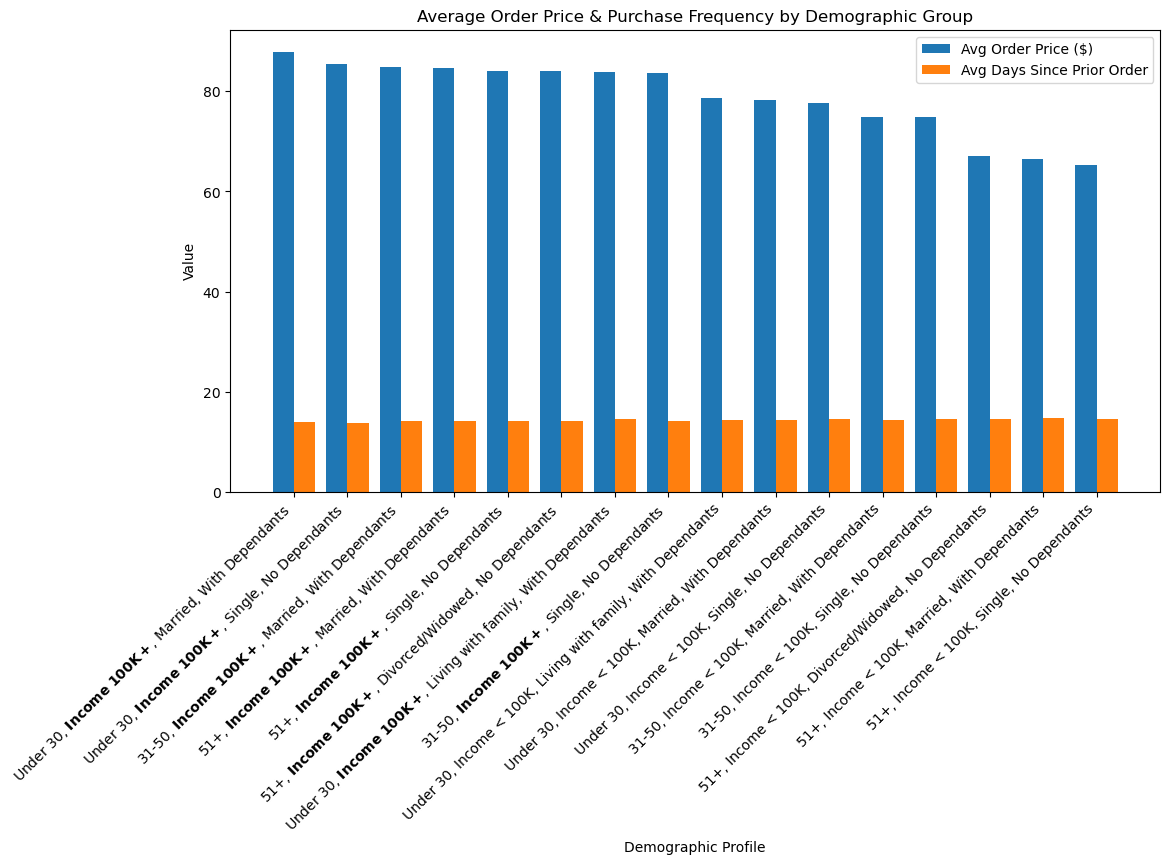

In [43]:
# Sort by avg_order_price for better visualization
df_demo_agg = df_demo_agg.sort_values(by="avg_order_price", 
                                      ascending=False)

# Set positions for bars
x = np.arange(len(df_demo_agg))  # Label locations
width = 0.4  # Width of bars

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting two different bars for avg_order_price and avg_days_since_prior_order
bar1 = ax.bar(x - width/2, df_demo_agg['avg_order_price'], width, label='Avg Order Price ($)', color='tab:blue')
bar2 = ax.bar(x + width/2, df_demo_agg['avg_days_since_prior_order'], width, label='Avg Days Since Prior Order', color='tab:orange')

# Formatting
ax.set_xlabel("Demographic Profile")
ax.set_ylabel("Value")
ax.set_title("Average Order Price & Purchase Frequency by Demographic Group")
ax.set_xticks(x)

# Modify tick labels for emphasis: Bold "Income 100K+" only
xtick_labels = []
for label in df_demo_agg['demographic_profile']:
    if "Income 100K+" in label:
        formatted_label = label.replace("Income 100K+", r"$\bf{Income\ 100K+}$")  # Latex-style bold
    else:
        formatted_label = label
    xtick_labels.append(formatted_label)

ax.set_xticklabels(xtick_labels, rotation=45, ha="right", fontsize=10)

ax.legend()


# Show plot
plt.show()


In [44]:
# Saving
fig.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_demographics_exp_freq.png'), 
            dpi=300, 
            bbox_inches='tight')

We see that all there is very little difference when it comes to order frequency between demographic groups. However when it comes to the average price of an order, the top 8 are all in the 100k income group and the bottom 8 are all < 100K. The other demographic markers are mixed and there is no strong trend

# 6.3 Checking Expenditure and Frequency per region

In [45]:
# Aggregate per region group, average price per order and order frequency
df_region_agg = df_user_agg.groupby('region').agg(
    avg_days_since_prior_order=('avg_days_since_prior_order', 'mean'),
    avg_order_price=('avg_order_price', 'mean')
).reset_index()

In [46]:
print(df_region_agg)


      region  avg_days_since_prior_order  avg_order_price
0    Midwest                   14.384527        78.582466
1  Northeast                   14.311633        78.089409
2      South                   14.366573        78.234276
3       West                   14.300034        78.255806


Differences by region too small to be worth plotting. The midwest has a slightly higher average order price, yet a slightly longer time between orders

# 6.4 Investigating most popular product-types by region

In [ ]:
# Step 1: Grouping by 'region' and 'department' to count the number of orders per department
department_counts_region = ( df_min5.groupby(['region', 'department'])['department']
                     .count()
                     .reset_index(name='order_count') )

In [ ]:
# 2: For each region group, get the top 10 departments by order count
top10_departments_by_region = ( department_counts_region
                                  .sort_values(by=['region', 'order_count'], 
                                               ascending=[True, False])
                                                 .groupby('region')
                                                 .head(10) )

In [49]:
# 3. Capture all values 
top_departments_by_region = ( department_counts_region
                             .sort_values(by=['region', 'order_count'],
                                          ascending=[True, False])
                                          .copy()  # ensure working with a full DataFrame and not grouped object
)

In [50]:
# Quick look at top 10 of each region to get feel
top10_departments_by_region.head(40)

,region,department,order_count
19,Midwest,produce,2134115
7,Midwest,dairy eggs,1212490
20,Midwest,snacks,645143
3,Midwest,beverages,598979
10,Midwest,frozen,498225
16,Midwest,pantry,420334
2,Midwest,bakery,261753
6,Midwest,canned goods,237459
8,Midwest,deli,234464
9,Midwest,dry goods pasta,193463


In [51]:
# Checking that all values saved
top_departments_by_region['region'].value_counts()

region
Midwest      21
Northeast    21
South        21
West         21
Name: count, dtype: int64

In [52]:
print(type(top_departments_by_region))

<class 'pandas.core.frame.DataFrame'>


In [53]:
# Getting each regions' product preference as % of total orders
    # First calculating total
top_departments_by_region['region_total'] = top_departments_by_region.groupby('region')['order_count'].transform('sum')

In [54]:
# Converting value counts to % of total
top_departments_by_region['percent_of_region'] = (top_departments_by_region['order_count'] / top_departments_by_region['region_total']) * 100

Visualising on heatmap

In [55]:
# Pivotting data for a heatmap
heatmap_data = top_departments_by_region.pivot(index='department', columns='region', values='percent_of_region')

# Sort departments by their average % share for better visual
heatmap_data = heatmap_data.loc[heatmap_data.mean(axis=1).sort_values(ascending=False).index]

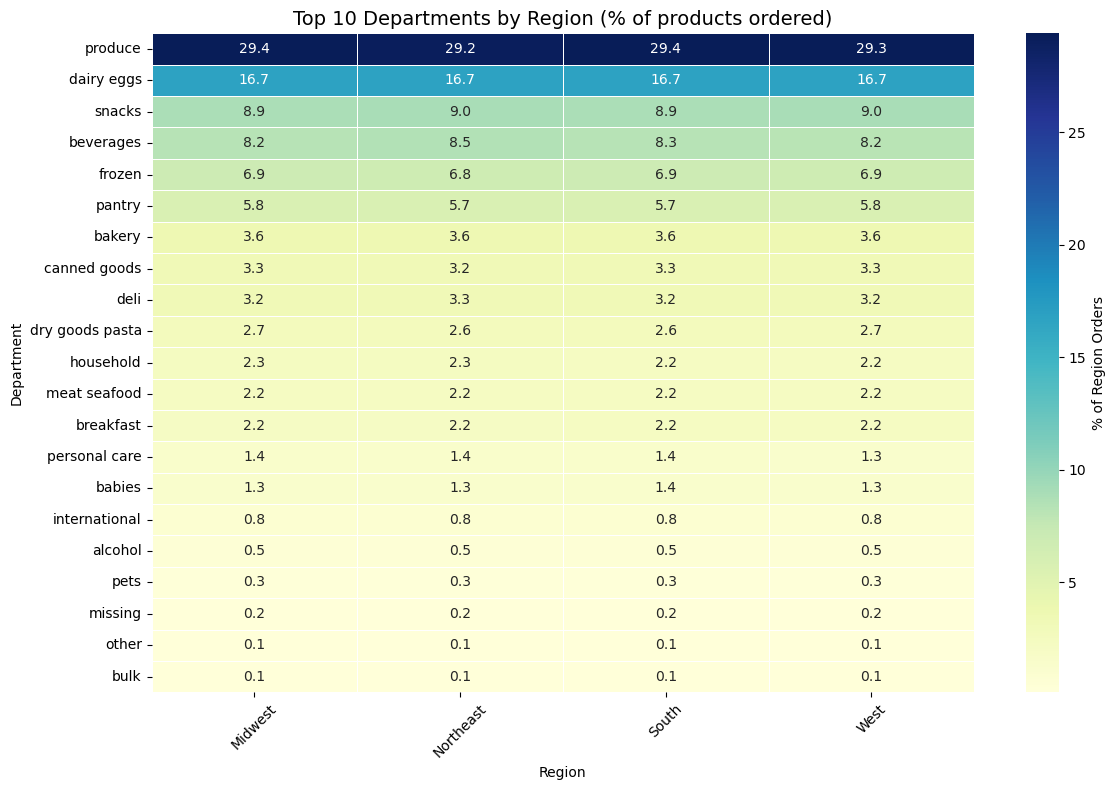

In [56]:
# Plotting on heatmap
plt_region_heat = plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt=".1f", 
            cmap="YlGnBu", 
            linewidths=0.5, 
            cbar_kws={'label': '% of Region Orders'})

plt.title('Top 10 Departments by Region (% of products ordered)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# saving
plt_region_heat.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'heat_region_departments.png'), 
            dpi=300, 
            bbox_inches='tight')

Patterns of customer preferences are remarkably similar across regions (undoubtedly due the fact that the customer data is fabricated). If we went to more decimal points we might be able to tease out some minor ones but essentially the different types of products are ordered at the same relative frequences across all 4 US regions